Importing libraries and labeling the columns.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
gdp_data=pd.read_csv("indiaGDP.csv",header=None)
gdp_data.head()

,0,1,2,3,4
0,1960,37.03,18.90,82,3.85
1,1961,39.23,3.72,85,3.85
2,1962,42.16,2.93,90,5.30
3,1963,48.42,5.99,101,12.51
4,1964,56.48,7.45,116,14.25


In [3]:
labels=['Year','GDP','Growth','Per Capita Income','Annual Growth (PCI)']
gdp_data.columns=labels
gdp_data.head()

,Year,GDP,Growth,Per Capita Income,Annual Growth (PCI)
0,1960,37.03,18.90,82,3.85
1,1961,39.23,3.72,85,3.85
2,1962,42.16,2.93,90,5.30
3,1963,48.42,5.99,101,12.51
4,1964,56.48,7.45,116,14.25


In [4]:
gdp_new=gdp_data[['Year','GDP']].copy()
gdp_new.head()

,Year,GDP
0,1960,37.03
1,1961,39.23
2,1962,42.16
3,1963,48.42
4,1964,56.48


In [5]:
gdp_only=gdp_data['GDP'].copy()
gdp_only.head()
gdp_only=np.array(gdp_only)
gdp_only

array([  37.03,   39.23,   42.16,   48.42,   56.48,   59.55,   45.87,
         50.13,   53.09,   58.45,   62.42,   67.35,   71.46,   85.52,
         99.53,   98.47,  102.72,  121.49,  137.3 ,  152.99,  186.33,
        193.49,  200.75,  218.26,  212.16,  232.51,  248.99,  279.03,
        296.59,  296.04,  320.98,  270.11,  288.21,  279.3 ,  327.28,
        360.28,  392.9 ,  415.87,  421.35,  458.82,  468.39,  485.44,
        414.94,  607.7 ,  709.15,  820.38,  940.26, 1216.74, 1198.9 ,
       1341.89, 1675.62, 1823.05, 1827.64, 1856.72, 2039.13, 2103.59,
       2294.8 , 2651.47, 2702.93, 2831.55, 2667.69, 3173.4 ])

In [6]:
print("Shape: ",gdp_new.shape)
print("\nData Types:\n",gdp_new.dtypes)

Shape:  (62, 2)

Data Types:
 Year      int64
GDP     float64
dtype: object


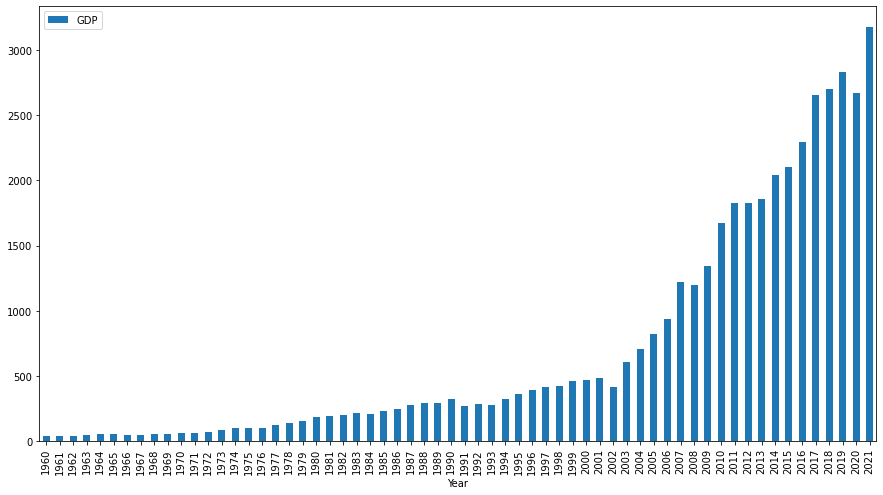

In [7]:
gdp_new.plot.bar('Year','GDP',figsize=(15,8))

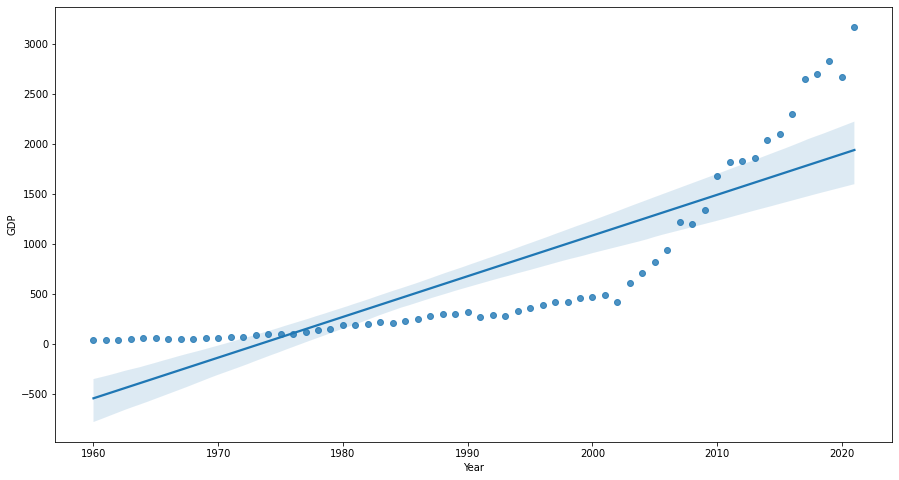

In [8]:
plt.figure(figsize=(15,8))
sns.regplot(x='Year',y='GDP',data=gdp_new)

In [28]:
train,test=train_test_split(gdp_new)

In [29]:
gdp_train=train['GDP'].copy()
gdp_train=np.array(gdp_train)
gdp_train

array([ 485.44,  820.38, 2702.93,  232.51,   42.16,  193.49,   71.46,
       3173.4 ,  320.98,  200.75, 1675.62, 2831.55, 1823.05,   50.13,
         67.35,  296.04,   48.42,  102.72,  940.26,   39.23, 1856.72,
         85.52,   53.09,  458.82,  212.16, 1341.89,  152.99,  186.33,
        607.7 ,   62.42,  468.39,  414.94, 2651.47,   99.53,  392.9 ,
       2294.8 ,  218.26,  288.21,  296.59, 2039.13,  270.11, 2667.69,
        121.49,   58.45,  248.99,   45.87])

In [30]:
gdp_test=test['GDP'].copy()
gdp_test=np.array(gdp_test)
gdp_test

array([2103.59, 1827.64,  709.15,  327.28, 1198.9 ,   56.48,   37.03,
        415.87,   59.55,  137.3 ,   98.47,  279.03,  360.28,  279.3 ,
        421.35, 1216.74])

In [12]:
pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-39rb2dd9
  Running command git clone -q https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-39rb2dd9
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0+16.g400f84d-cp38-cp38-linux_x86_64.whl size=4476295 sha256=d27d4c68358a3951992584674446f2c29cf8e08fad404d15378e9e8d71e28fb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-duo_qtpk/wheels/8a/33/e4/b577aeaf3435222ffd76339bd728390afc103237af5cc8064e
Successfully built sklearn-contrib-py-earth


In [31]:
from pyearth import Earth

In [32]:
model = Earth().fit(train.iloc[:,:1],train.iloc[:,1:])

In [38]:
pred=model.predict(test.iloc[:,:1])
pred2=model.predict(train.iloc[:,:1])
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test.iloc[:,:1],pred)
print("Mean Squared Error is: ",mse)
print("Accuracy on TESTING set: %.2f"%((sm.r2_score(gdp_test, pred))*100))
print("Accuracy on TRAINING set: %.2f"%((sm.r2_score(gdp_train,pred2))*100))

Mean Squared Error is:  2353926.1412179125
Accuracy on TESTING set: 99.12
Accuracy on TRAINING set: 99.39


Testing Set


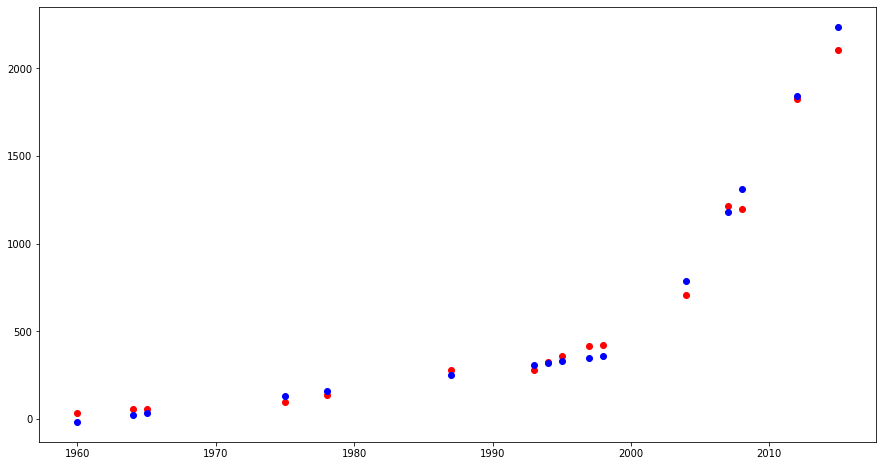

In [34]:
print("Testing Set")
plt.figure(figsize=(15,8))
plt.plot(test['Year'],test['GDP'],'ro')
plt.plot(test['Year'],pred,'bo')
plt.show()

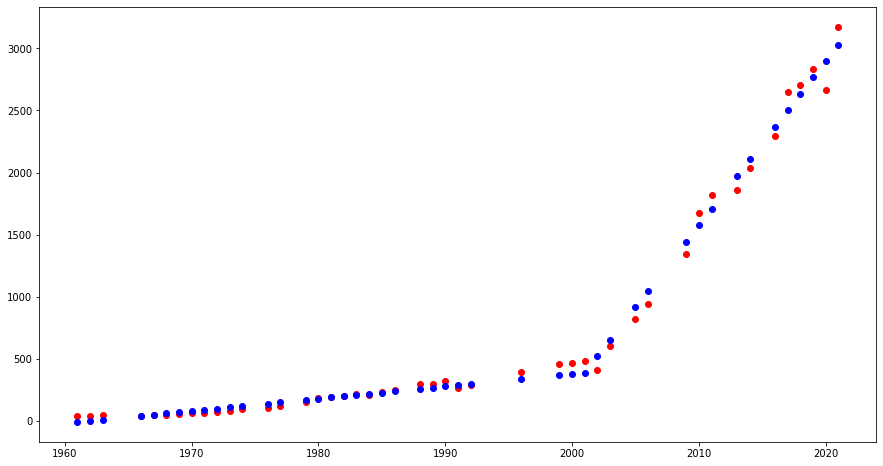

In [35]:
plt.figure(figsize=(15,8))
plt.plot(train['Year'],train['GDP'],'ro')
plt.plot(train['Year'],pred2,'bo')
plt.show()

In [36]:
print("=================================================")
year=int(input("Enter the year to find the PREDICTED GDP OF:"))
print("=================================================\n")

gdp=model.predict([[year]])
gdp_gro=gdp-model.predict([[2022]])

print("PREDICTED GDP for",year,"          : %.2f"%gdp,"Billion USD")
print("PREDICTED GROWTH IN GDP from 2022: %.2f"%gdp_gro,"Billion USD")
print("=================================================\n")

Enter the year to find the PREDICTED GDP OF:2023

PREDICTED GDP for 2023           : 3293.48 Billion USD
PREDICTED GROWTH IN GDP from 2022: 132.04 Billion USD

